In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1 - Import Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Data understanding

Train Size:
(50000, 32, 32, 3)
(50000, 1)
Test Size:
(10000, 32, 32, 3)
(10000, 1)


Text(0.5, 1.0, 'deer')

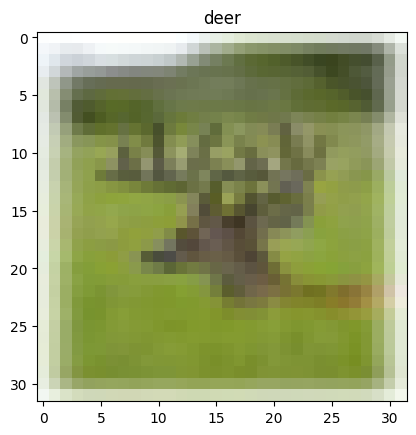

In [3]:
print("Train Size:")
print(x_train.shape)
print(y_train.shape)
print("Test Size:")
print(x_test.shape)
print(y_test.shape)

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(low= 0, high=50000)
plt.imshow(x_train[idx])
plt.title(label_names[int(y_train[idx])])

# 2- Preprocess data

In [4]:
X_train = x_train/255.0
X_test = x_test/255.0

Y_train = tf.keras.utils.to_categorical(np.squeeze(y_train), 10)
Y_test = tf.keras.utils.to_categorical(np.squeeze(y_test), 10)

print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


# 3- Model development
Conv Layers:

1- 32 filter 3x3 + relu

2- 32 filter 3x3 + relu

3- max pooling 2x2

4- 64 filter 3x3 + relu

5- 64 filter 3x3 + relu

6- max pooling 2x2

7- 128 filter 3x3 + relu

8- 128 filter 3x3 + relu

# Classification Head

9- Flattening

10- Dense 128

11: dense 10


In [12]:
def create_model():
    model = tf.keras.models.Sequential()


    model.add( tf.keras.layers.Conv2D(filters = 32, 
                                      kernel_size = 3, 
                                      activation='relu', 
                                      padding='same', 
                                      input_shape=X_train.shape[1:]))

    model.add( tf.keras.layers.Conv2D(filters = 32, 
                                      kernel_size = 3, 
                                      activation='relu', 
                                      padding='same'))

    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


    model.add( tf.keras.layers.Conv2D(filters = 64, 
                                      kernel_size = 3, 
                                      activation='relu', 
                                      padding='same'))
    model.add( tf.keras.layers.Conv2D(filters = 64, 
                                      kernel_size = 3, 
                                      activation='relu', 
                                      padding='same'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add( tf.keras.layers.Conv2D(filters = 128, 
                                      kernel_size = 3, 
                                      activation='relu', 
                                      padding='same'))

    model.add( tf.keras.layers.Conv2D(filters = 128, 
                                      kernel_size = 3, 
                                      activation='relu', 
                                      padding='same'))

    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(128, activation='relu'))
    model.add( tf.keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model()



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

## Set cost- evaluation metric- optimizer

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())

# 4- Triain model

In [8]:
hist = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 44s 28ms/step - loss: 1.5009 - categorical_accuracy: 0.4495 - val_loss: 1.1605 - val_categorical_accuracy: 0.5834
Epoch 2/10
1407/1407 [==============================] - 40s 29ms/step - loss: 1.0007 - categorical_accuracy: 0.6451 - val_loss: 0.8975 - val_categorical_accuracy: 0.6952
Epoch 3/10
1407/1407 [==============================] - 40s 29ms/step - loss: 0.7965 - categorical_accuracy: 0.7154 - val_loss: 0.7379 - val_categorical_accuracy: 0.7430
Epoch 4/10
1407/1407 [==============================] - 40s 29ms/step - loss: 0.6667 - categorical_accuracy: 0.7651 - val_loss: 0.7199 - val_categorical_accuracy: 0.7500
Epoch 5/10
1407/1407 [==============================] - 40s 29ms/step - loss: 0.5616 - categorical_accuracy: 0.8015 - val_loss: 0.7661 - val_categorical_accuracy: 0.7436
Epoch 6/10
1407/1407 [==============================] - 40s 29ms/step - loss: 0.4684 - categorical_accuracy: 0.8347 - val_loss: 0.7414 - val_categoric

## Analyze training curve

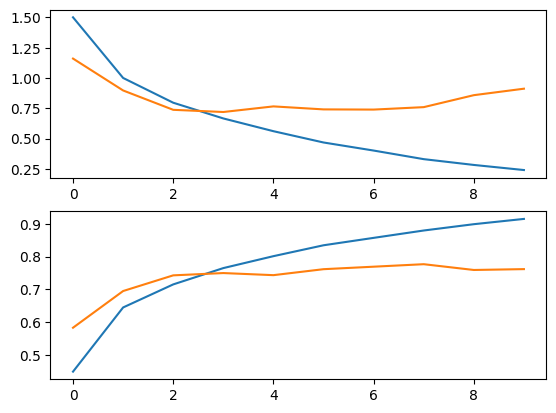

In [9]:
fig, axs = plt.subplots(2,1)
axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])

axs[1].plot(hist.history['categorical_accuracy'])
axs[1].plot(hist.history['val_categorical_accuracy'])


# 5- Evaluate model

In [10]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9502 - categorical_accuracy: 0.7572


[0.9502378106117249, 0.7572000026702881]

#  ============== Use Data Augmentation ==============

# Data Augmentation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen_train = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)
data_gen_train.fit(X_train)

# img_it = data_gen_train.flow(X_train, batch_size=10)

# Create another model

In [33]:
model_with_augmentation = create_model()
model_with_augmentation.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                                loss=tf.keras.losses.CategoricalCrossentropy(),
                                metrics=tf.keras.metrics.CategoricalAccuracy())

# Train model

In [34]:
hist = model_with_augmentation.fit(data_gen_train.flow(X_train, Y_train, batch_size=32,subset='training'),
                                   validation_data=data_gen_train.flow(X_train, Y_train,batch_size=32, subset='validation'),
                                   epochs = 20)

Epoch 1/10
1250/1250 [==============================] - 56s 44ms/step - loss: 1.8359 - categorical_accuracy: 0.3152 - val_loss: 1.5361 - val_categorical_accuracy: 0.4321
Epoch 2/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.4422 - categorical_accuracy: 0.4719 - val_loss: 1.3322 - val_categorical_accuracy: 0.5179
Epoch 3/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.2705 - categorical_accuracy: 0.5420 - val_loss: 1.2148 - val_categorical_accuracy: 0.5618
Epoch 4/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.1588 - categorical_accuracy: 0.5849 - val_loss: 1.1065 - val_categorical_accuracy: 0.6039
Epoch 5/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.0753 - categorical_accuracy: 0.6154 - val_loss: 1.0778 - val_categorical_accuracy: 0.6203
Epoch 6/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.0144 - categorical_accuracy: 0.6417 - val_loss: 1.0008 - val_categoric

# Training curve

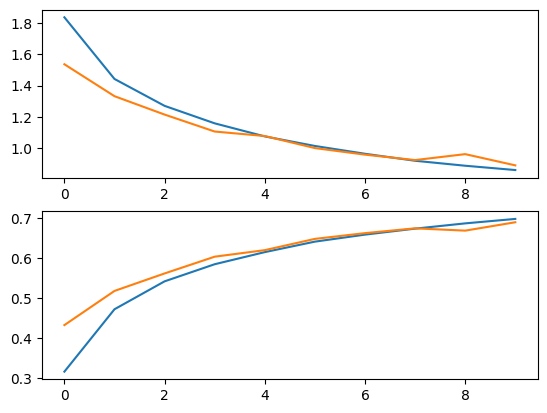

In [35]:
fig, axs = plt.subplots(2,1)
axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])

axs[1].plot(hist.history['categorical_accuracy'])
axs[1].plot(hist.history['val_categorical_accuracy'])

## Evaluate model

In [36]:
model.evaluate(X_test,Y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.